In [1]:
#  release an unreferenced memory 

import gc
import warnings
warnings.simplefilter('ignore')

import subprocess
gc.collect()

35

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#read in pickle file

ords_prods_merge = pd.read_pickle(r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets\Sent Client\orders_products_merge_comined_2.pkl')

In [4]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,num_dependants,fam_status,income,region,spend_habits
0,2539329,1,prior,1,2,8,0.0,-60,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
1,2398795,1,prior,2,3,7,15.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
2,473747,1,prior,3,3,12,21.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
3,2254736,1,prior,4,4,7,29.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity
4,431534,1,prior,5,4,15,28.0,-60,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3,High Activity


In [5]:
#check columns

ords_prods_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'loyalty_flag_price', 'order_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'num_dependants',
       'fam_status', 'income', 'region', 'spend_habits'],
      dtype='object')

In [6]:
ords_prods_merge.shape

(30171424, 33)

In [7]:
#create new df with specific columns

ords_prods_merge_new = ords_prods_merge[['age','income', 'department_id', 'num_dependants', 'orders_day_of_the_week', 'days_since_prior_order', 'region', 'spend_habits']].copy()

In [8]:
ords_prods_merge_new.head(10)

,age,income,department_id,num_dependants,orders_day_of_the_week,days_since_prior_order,region,spend_habits
0,31,40423,7,3,2,0.0,3,High Activity
1,31,40423,7,3,3,15.0,3,High Activity
2,31,40423,7,3,3,21.0,3,High Activity
3,31,40423,7,3,4,29.0,3,High Activity
4,31,40423,7,3,4,28.0,3,High Activity
5,31,40423,7,3,2,19.0,3,High Activity
6,31,40423,7,3,1,20.0,3,High Activity
7,31,40423,7,3,1,14.0,3,High Activity
8,31,40423,7,3,1,0.0,3,High Activity
9,31,40423,7,3,4,30.0,3,High Activity


In [9]:
ords_prods_merge_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404854
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   age                     int8   
 1   income                  int32  
 2   department_id           int8   
 3   num_dependants          int8   
 4   orders_day_of_the_week  int8   
 5   days_since_prior_order  float16
 6   region                  int32  
 7   spend_habits            object 
dtypes: float16(1), int32(2), int8(4), object(1)
memory usage: 863.2+ MB


In [10]:
ords_prods_merge_new.describe()

,age,income,department_id,num_dependants,orders_day_of_the_week,days_since_prior_order,region
count,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,3.017142e+07,30171424.0,3.017142e+07
mean,4.947082e+01,9.977020e+04,9.923708e+00,1.502004e+00,2.742373e+00,NaN,2.668825e+00
std,1.848772e+01,4.318342e+04,6.283019e+00,1.118931e+00,2.088409e+00,0.0,1.042416e+00
min,1.800000e+01,2.590300e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00
25%,3.300000e+01,6.742400e+04,4.000000e+00,1.000000e+00,1.000000e+00,4.0,2.000000e+00
50%,4.900000e+01,9.682300e+04,9.000000e+00,2.000000e+00,3.000000e+00,7.0,3.000000e+00
75%,6.500000e+01,1.281500e+05,1.600000e+01,3.000000e+00,5.000000e+00,14.0,4.000000e+00
max,8.100000e+01,5.939010e+05,2.100000e+01,3.000000e+00,6.000000e+00,30.0,4.000000e+00


In [11]:
#drop dups

ords_prods_merge_dup = ords_prods_merge_new.drop_duplicates()

In [12]:
#check df for nan values

ords_prods_merge_dup.isnull().sum()

age                       0
income                    0
department_id             0
num_dependants            0
orders_day_of_the_week    0
days_since_prior_order    0
region                    0
spend_habits              0
dtype: int64

In [13]:
#fixing [....] not found in index

columns = ['age','income', 'department_id', 'num_dependants', 'orders_day_of_the_week', 'days_since_prior_order']
ords_prods_merge_index = ords_prods_merge_dup.reindex(columns=columns)
ords_prods_merge_index[columns] = ords_prods_merge_index[columns].astype(int)

In [14]:
ords_prods_merge_index.sort_index(axis=0, inplace=True)

In [15]:
ords_prods_merge_convert = ords_prods_merge_index.convert_dtypes(int)

In [16]:
#sub-df

age_income = ords_prods_merge_convert[['age', 'income', 'num_dependants']]

Text(0.5, 1.0, 'Household Income')

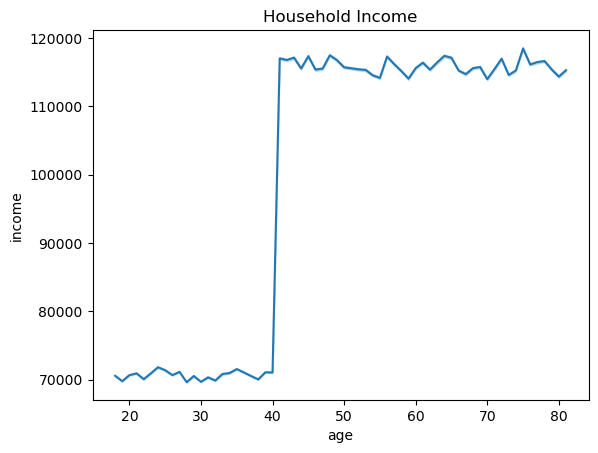

In [17]:
#create chart

line = sns.lineplot(data = age_income, x = 'age',y = 'income')
plt.title('Household Income')

At the age of 40 there is a large jump in income which peaks at around 140K.  There is a steep decline in income around the 75-77 years of age with another sharp upwards trend at around age 79-80. 

Text(0.5, 1.0, 'Household size')

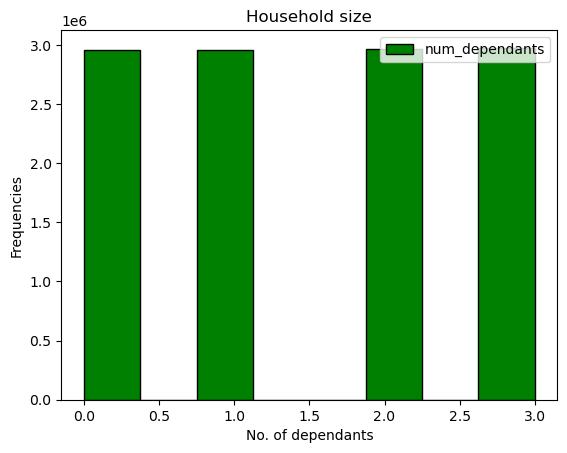

In [18]:
#Create histogram 

hist = age_income.plot(x = 'age',y = 'num_dependants', kind='hist', color='green', edgecolor='black', bins=int(8))
plt.xlabel('No. of dependants')
plt.ylabel('Frequencies')
plt.title('Household size')

The is highest number of depends seems to between 2-3 persons per houshold.  

In [19]:
#create new df with specific columns

cust_profile = ords_prods_merge[['age','income', 'department_id', 'num_dependants', 'orders_day_of_the_week', 'days_since_prior_order']].copy()

In [20]:
cust_profile.columns

Index(['age', 'income', 'department_id', 'num_dependants',
       'orders_day_of_the_week', 'days_since_prior_order'],
      dtype='object')

In [21]:
#new df index

cust_profile.sort_index(axis=0, inplace=True)

In [22]:
#create new sub-df

cust_spend = cust_profile[['age', 'income', 'department_id', 'num_dependants', 'days_since_prior_order']]

In [23]:
#find top 10 items

top_10 = cust_spend.sort_values(by='department_id', ascending=False).head(10)

In [24]:
top_10

,age,income,department_id,num_dependants,days_since_prior_order
28368158,56,156307,21,3,8.0
28963774,65,149947,21,3,24.0
9245927,20,70427,21,1,3.0
24549148,29,101262,21,2,16.0
24762645,71,129318,21,1,8.0
9245926,20,70427,21,1,7.0
6253094,66,106680,21,1,3.0
6253093,66,106680,21,1,3.0
24549160,29,101262,21,2,16.0
885358,63,131983,21,2,5.0


<AxesSubplot:xlabel='days_since_prior_order', ylabel='num_dependants'>

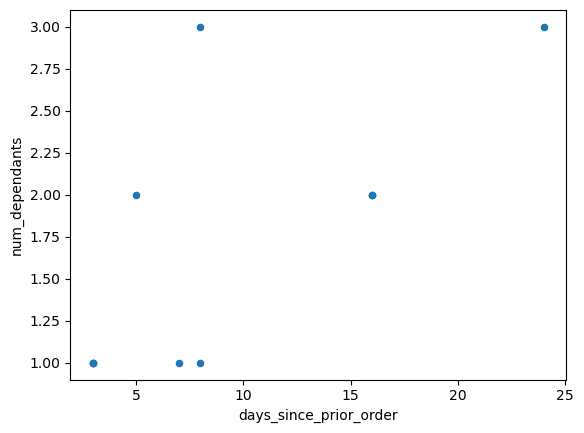

In [25]:
top_10.plot(x="days_since_prior_order", y="num_dependants", kind="scatter")

Based on the chart there is very loose correlation between household size and order frequency averging around 8 days between orders.

In [26]:
#find top 5 ages

top_5_age = cust_spend.sort_values(by='age', ascending=False).head(5)

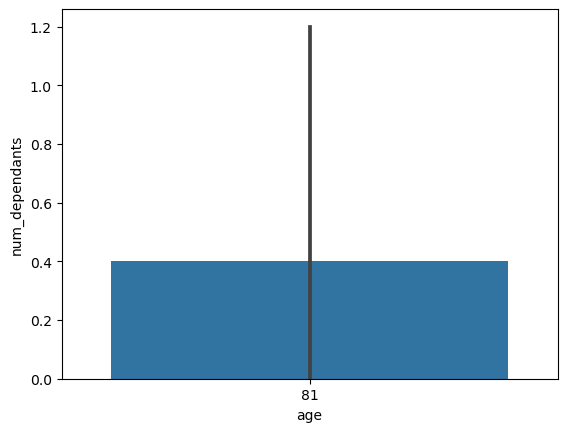

In [27]:
top_5_age_bar = sns.barplot(x='age',y='num_dependants', data=top_5_age)

In [28]:
region_spend = ords_prods_merge[['spend_habits', 'prices']].copy()

In [29]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [30]:
# export line chart outside of Jupyter in the form of an image file

line.figure.savefig(os.path.join(path_new, 'Prepared data', 'age_income_line_task_10.png'))

In [31]:
# export scatter chart outside of Jupyter in the form of an image file

hist.figure.savefig(os.path.join(path_new, 'Prepared data', 'household_size_task_10.png'))

In [32]:
# export bar chart outside of Jupyter in the form of an image file

top_5_age_bar.figure.savefig(os.path.join(path_new, 'Prepared data', 'top_5_10.png'))

In [33]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int8   
 4   orders_day_of_the_week  int8   
 5   order_hour_of_day       int32  
 6   days_since_prior_order  float16
 7   product_id              int8   
 8   add_to_cart_order       int64  
 9   reordered               int8   
 10  _merge                  object 
 11  product_name            object 
 12  aisle_id                int8   
 13  department_id           int8   
 14  prices                  float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_period_of_day   object 
 18  max_order               int8   
 19  loyalty_flag            object 
 20  loyalty_flag_price      object 
 21  order_flag              objec

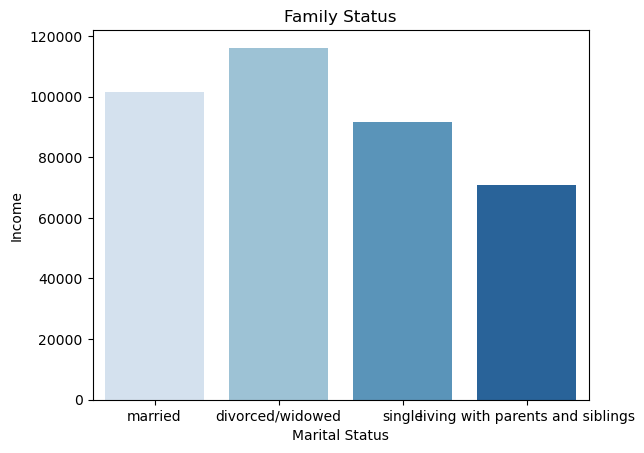

In [34]:
#Creating bar plot
ords_prods_merge_plot = sns.barplot(x = 'fam_status',y = 'income',data = ords_prods_merge, palette = "Blues")

#Adding the aesthetics
plt.title('Family Status')
plt.xlabel('Marital Status')
plt.ylabel('Income') 
# Show the plot
plt.show()

In [35]:
# export bar chart outside of Jupyter in the form of an image file

ords_prods_merge_plot.figure.savefig(os.path.join(path_new, 'Prepared data', 'fam_status_10.png'))

In [36]:
# Multiple Aggregations - multiple statistics

Cust_profile = ords_prods_merge.groupby('product_name').agg({'days_since_prior_order': ['mean', 'min', 'max']})

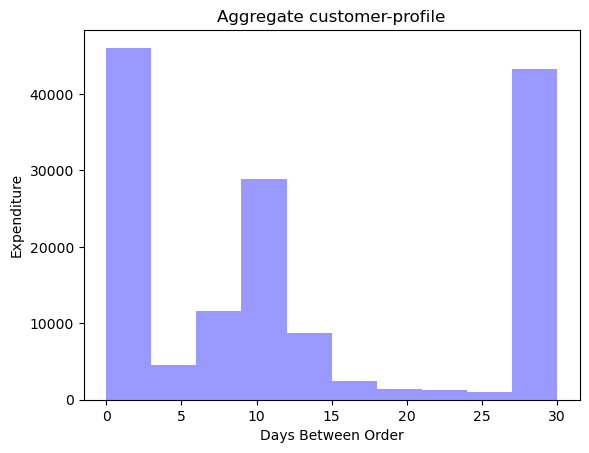

In [37]:
#Plotting bar histogram

bar_hist= sns.distplot(Cust_profile['days_since_prior_order'], kde=False, color='blue', bins=10)

#Adding the aesthetics
plt.title('Aggregate customer-profile')
plt.xlabel('Days Between Order')
plt.ylabel('Expenditure') 

# Show the plot
plt.show()

The highest expenditures are 1-2 days of order then there is an increase again around days 9-12 and then again on days 27-30. 

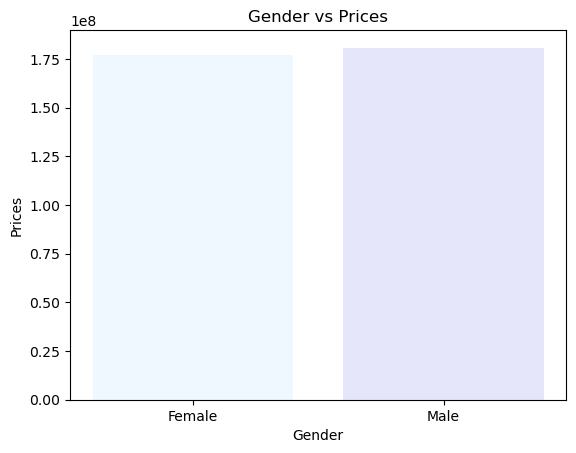

In [38]:
#Creating the dataset
 
df =ords_prods_merge.groupby('gender')['prices'].sum().to_frame().reset_index()

#Creating the column plot 
gender = plt.bar(df['gender'],df['prices'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

#Adding the aesthetics

plt.title('Gender vs Prices')
plt.xlabel('Gender')
plt.ylabel('Prices')

#Show the plot

plt.show()

In [39]:
ords_prods_merge['region'] = ords_prods_merge['region'].astype('int')

In [40]:
ords_prods_merge['region'] = pd.to_numeric(ords_prods_merge['region'])

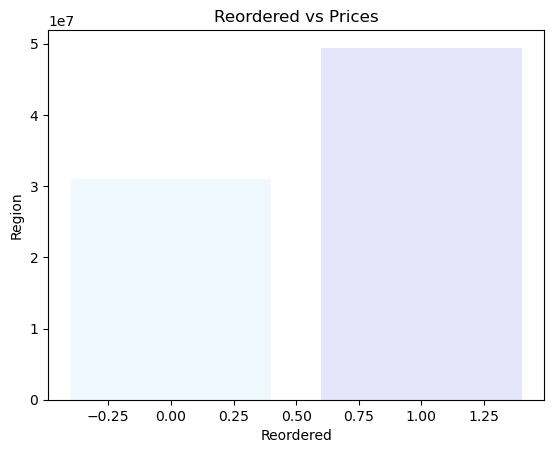

In [41]:
#Creating the dataset
 
df_2 =ords_prods_merge.groupby('reordered')['region'].sum().to_frame().reset_index()

#Creating the column plot 
plt.bar(df_2['reordered'], df_2['region'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

plt.title('Reordered vs Prices')
plt.xlabel('Reordered')
plt.ylabel('Region')

plt.show()

In [42]:
# export hist bar chart outside of Jupyter in the form of an image file

bar_hist.figure.savefig(os.path.join(path_new, 'Prepared data', 'freq_dependants_bar_task_10.png'))

In [43]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [44]:
# Export data to pkl

ords_prods_merge.to_pickle(os.path.join(path_new, 'Sent Client', 'orders_products_merge_comined_2.pkl'))